In [5]:
import os
import rnnSMAP
from rnnSMAP import runTrainLSTM
import numpy as np
import matplotlib.pyplot as plt
import imp
imp.reload(rnnSMAP)
rnnSMAP.reload()

#################################################
# noise affact on sigmaX (or sigmaMC)
doOpt = []
# doOpt.append('train')
doOpt.append('test')
# doOpt.append('plotMap')
doOpt.append('plotErrBox')
doOpt.append('plotConf')

# noiseNameLst = ['0', '5e3', '1e2', '2e2', '5e2', '1e1']

noiseNameLst = ['0', '1e2', '2e2', '3e2', '4e2', '5e2',
                '6e2', '7e2', '8e2', '9e2', '1e1']
strErrLst = ['RMSE', 'ubRMSE']
saveFolder = os.path.join(
    rnnSMAP.kPath['dirResult'], 'paperSigma')
rootDB = rnnSMAP.kPath['DB_L3_NA']

load rnnSMAP


In [6]:
#################################################
if 'test' in doOpt:
    statErrLst = list()
    statSigmaLst = list()
    statConfLst = list()
    for k in range(0, len(noiseNameLst)):
        testName = 'CONUSv4f1'
        if k == 0:
            out = 'CONUSv4f1_y15_Forcing'
            targetName = 'SMAP_AM'
        else:
            out = 'CONUSv4f1_y15_Forcing_sn'+noiseNameLst[k]
            targetName = 'SMAP_AM_sn'+noiseNameLst[k]

        rootOut = rnnSMAP.kPath['OutSigma_L3_NA']
        caseStrLst = ['sigmaMC', 'sigmaX', 'sigma']
        ds = rnnSMAP.classDB.DatasetPost(
            rootDB=rootDB, subsetName=testName, yrLst=[2016, 2017])
        ds.readData(var=targetName, field='SMAP')
        ds.readPred(out=out, drMC=100, field='LSTM', rootOut=rootOut)

        statErr = ds.statCalError(predField='LSTM', targetField='SMAP')
        statErrLst.append(statErr)
        statSigma = ds.statCalSigma(field='LSTM')
        statSigmaLst.append(statSigma)
        statConf = ds.statCalConf(predField='LSTM', targetField='SMAP')
        statConfLst.append(statConf)


/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/CONUSv4f1.csv
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv4f1/2016/SMAP_AM.csv 0.03374624252319336
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv4f1/2017/SMAP_AM.csv 0.02698063850402832
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv4f1_y15_Forcing/testSigma_CONUSv4f1_2016_2017_ep500.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv4f1_y15_Forcing/test_CONUSv4f1_2016_2017_ep500.csv
/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/CONUSv4f1.csv
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv4f1/2016/SMAP_AM_sn1e2.csv 0.02875494956970215
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv4f1/2017/SMAP_AM_sn1e2.csv 0.02802133560180664
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv4f1_y15_Forcing_sn1e2/testSigma_CONUSv4f1_2016_2017_ep500.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv4f1_y15_Forcing_sn1e2/test_CONUSv4f1_2016_2017_ep50

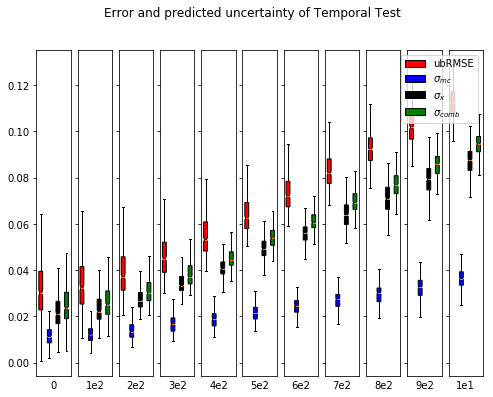

In [3]:
#################################################
if 'plotErrBox' in doOpt:
    data = list()
    strErr = 'ubRMSE'
    strSigmaLst = ['sigmaMC', 'sigmaX', 'sigma']
    for k in range(0, len(noiseNameLst)):
        temp = list()
        temp.append(getattr(statErrLst[k], strErr))
        for strSigma in strSigmaLst:
            temp.append(getattr(statSigmaLst[k], strSigma))
        data.append(temp)
    fig = rnnSMAP.funPost.plotBox(
        data, labelC=noiseNameLst,
        labelS=['ubRMSE', r'$\sigma_{mc}$', r'$\sigma_x$', r'$\sigma_{comb}$'],
        title='Error and predicted uncertainty of Temporal Test')
    saveFile = os.path.join(saveFolder, 'noise_box.png')
#     fig.savefig(saveFile, dpi=600)

/home/kxf227/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


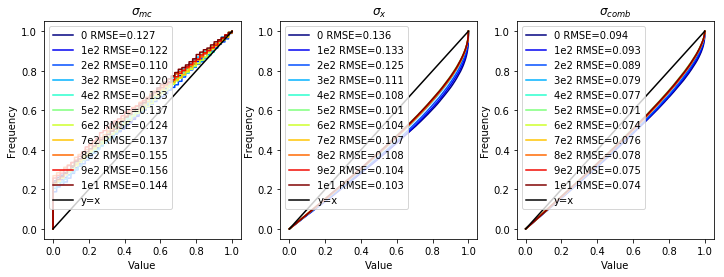

In [4]:
if 'plotConf' in doOpt:
    strSigmaLst = ['sigmaMC', 'sigmaX', 'sigma']
    titleLst = [r'$\sigma_{mc}$', r'$\sigma_{x}$', r'$\sigma_{comb}$']
    fig, axes = plt.subplots(ncols=len(titleLst), figsize=(12, 4))
    for iFig in range(0, 3):
        plotLst = list()
        for k in range(0, len(noiseNameLst)):
            plotLst.append(getattr(statConfLst[k], 'conf_'+strSigmaLst[iFig]))
        rnnSMAP.funPost.plotCDF(plotLst, ax=axes[iFig], legendLst=noiseNameLst)
        axes[iFig].set_title(titleLst[iFig])
    saveFile = os.path.join(saveFolder, 'noise_conf.png')
#     fig.savefig(saveFile, dpi=600)